# Basics of neural networks


## Using Data set
Data sets are taken from the UCI Machine Learning Repository
https://archive.ics.uci.edu/ml/datasets.php
The option is determined by the data set, which can be downloaded from the link above:
The option is determined by the data set, which can be downloaded from 


# Data Set Information: Seeds

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.


To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.

All of these parameters were real-valued continuous.



**1. Write a program that splits the original sample into a training set and a test set (training set, validation set, test set)**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Read data from txt file
data = pd.read_csv('seeds_dataset.txt', sep = "\t", header=None)
data.rename(columns={
    0 : 'area_A',
    1 : 'perimeter_P',
    2 : 'compactness',
    3 : 'length_kernel',
    4 : 'widht_kernel',
    5 : 'asymm_coef',
    6 : 'length_kernel_groove',
    7 : 'y'
}, inplace=True)
data.head()

,area_A,perimeter_P,compactness,length_kernel,widht_kernel,asymm_coef,length_kernel_groove,y
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [2]:
X = data.iloc[:, 0:7]
y = data.iloc[:, 7]
#print(X)
#print(y)
#Split the sample into training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3)

In [3]:
print("x-train-data: {}, y-train-data: {}".format(len(X_train), len(y_train)))
print("x-test-data: {},  y-test-data: {}".format(len(X_test), len(y_test)))


x-train-data: 147, y-train-data: 147
x-test-data: 63,  y-test-data: 63


**2. Build a model using Perceptron (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) and MLPClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). On the basis of experiments, select values for learning rate, the regularization parameter, the optimization function.**

alpha is our regularization parameter

solver is for our optimization function: there 3 different types

learning_rate: constant, invscaling, adaptive: schedule for weight updates

In [4]:
acc_perceptron_l1 = []
acc_perceptron_l2 = []
acc_perceptron_en = []
alphas = np.linspace(0.0001, 1, 100)


for i in alphas:
    clf_l1 = Perceptron(alpha= i, max_iter=2000, penalty="l1")
    clf_l2 = Perceptron(alpha= i, max_iter=2000, penalty="l2")
    clf_en = Perceptron(alpha= i, max_iter=2000, penalty="elasticnet")
    
    clf_l1.fit(X_train, y_train)
    clf_l2.fit(X_train, y_train)
    clf_en.fit(X_train, y_train)
    
    predictions_l1 = clf_l1.predict(X_test)
    predictions_l2 = clf_l2.predict(X_test)
    predictions_en = clf_en.predict(X_test)
    
    acc_l1 = accuracy_score(y_test, predictions_l1)
    acc_l2 = accuracy_score(y_test, predictions_l2)
    acc_en = accuracy_score(y_test, predictions_en)
    #print("Perceptron accuracy:", acc)
    acc_perceptron_l1.append(acc_l1)
    acc_perceptron_l2.append(acc_l2)
    acc_perceptron_en.append(acc_en)


print("Perceptron with parameter l1",np.max(acc_perceptron_l1))
print("Perceptron with parameter l2", np.max(acc_perceptron_l2))
print("Perceptron with parameter elastic net",np.max(acc_perceptron_en))



Perceptron with parameter l1 0.936507936508
Perceptron with parameter l2 0.619047619048
Perceptron with parameter elastic net 0.619047619048


In [5]:
acc_mlp1 = []
acc_mlp2 = []
acc_mlp3 = []


alphas = np.linspace(0.0001, 1, 100)

for i in alphas:
    mlp1 = MLPClassifier(solver="lbfgs", alpha= i, learning_rate="adaptive" ,max_iter=2000)
    mlp2 = MLPClassifier(solver="sgd", alpha= i, learning_rate="adaptive" ,max_iter=2000)
    mlp3 = MLPClassifier(solver="adam", alpha= i, learning_rate="adaptive" ,max_iter=2000)
    
    mlp1.fit(X_train, y_train)
    mlp2.fit(X_train, y_train)
    mlp3.fit(X_train, y_train)
    
    predictions1 = mlp1.predict(X_test)
    predictions2 = mlp2.predict(X_test)
    predictions3 = mlp3.predict(X_test)
    
                              
    acc1 = accuracy_score(y_test, predictions1)
    acc2 = accuracy_score(y_test, predictions2)
    acc3 = accuracy_score(y_test, predictions3)
   
    #print ("MLP accuracy: ",  acc)
    acc_mlp1.append(acc1)
    acc_mlp2.append(acc2)
    acc_mlp3.append(acc3)
   

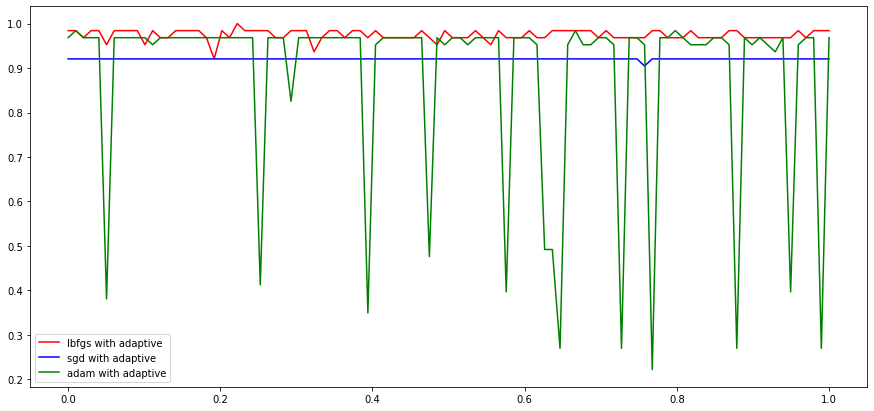

In [6]:
plt.figure(figsize=(15, 7))
plt.plot(alphas, acc_mlp1, color='red', label="lbfgs with adaptive")
plt.plot(alphas, acc_mlp2, color='blue', label="sgd with adaptive")
plt.plot(alphas, acc_mlp3, color='green', label="adam with adaptive")
plt.legend()
plt.show()


In [7]:
acc_mlp4 = []
acc_mlp5 = []
acc_mlp6 = []

alphas = np.linspace(0.0001, 1, 100)

for i in alphas:
    mlp4 = MLPClassifier(solver="lbfgs", alpha= i, learning_rate="constant" ,max_iter=2000)
    mlp5 = MLPClassifier(solver="sgd", alpha= i, learning_rate="constant" ,max_iter=2000)
    mlp6 = MLPClassifier(solver="adam", alpha= i, learning_rate="constant" ,max_iter=2000)
   
    mlp4.fit(X_train, y_train)
    mlp5.fit(X_train, y_train)
    mlp6.fit(X_train, y_train)

    predictions4 = mlp4.predict(X_test)
    predictions5 = mlp5.predict(X_test)
    predictions6 = mlp6.predict(X_test)
                              
    acc4 = accuracy_score(y_test, predictions4)
    acc5 = accuracy_score(y_test, predictions5)
    acc6 = accuracy_score(y_test, predictions6)

    #print ("MLP accuracy: ",  acc)
    acc_mlp4.append(acc4)
    acc_mlp5.append(acc5)
    acc_mlp6.append(acc6)


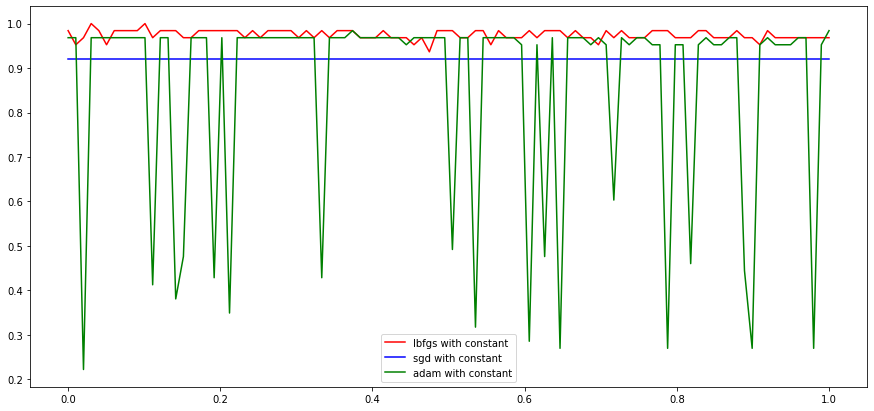

In [8]:
plt.figure(figsize=(15, 7))
plt.plot(alphas, acc_mlp4, color='red', label="lbfgs with constant")
plt.plot(alphas, acc_mlp5, color='blue', label="sgd with constant")
plt.plot(alphas, acc_mlp6, color='green', label="adam with constant")
plt.legend()
plt.show()

In [9]:
acc_mlp7 = []
acc_mlp8 = []
acc_mlp9 = []

alphas = np.linspace(0.0001, 1, 100)

for i in alphas:   
    mlp7 = MLPClassifier(solver="lbfgs", alpha= i, learning_rate="invscaling" ,max_iter=2000)
    mlp8 = MLPClassifier(solver="sgd", alpha= i, learning_rate="invscaling" ,max_iter=2000)
    mlp9 = MLPClassifier(solver="adam", alpha= i, learning_rate="invscaling" ,max_iter=2000)
    
    mlp7.fit(X_train, y_train)
    mlp8.fit(X_train, y_train)
    mlp9.fit(X_train, y_train)
    
    predictions7 = mlp7.predict(X_test)
    predictions8 = mlp8.predict(X_test)
    predictions9 = mlp9.predict(X_test)
    
    acc7 = accuracy_score(y_test, predictions7)
    acc8 = accuracy_score(y_test, predictions8)
    acc9 = accuracy_score(y_test, predictions9)
    #print ("MLP accuracy: ",  acc)

    acc_mlp7.append(acc7)
    acc_mlp8.append(acc8)
    acc_mlp9.append(acc9)


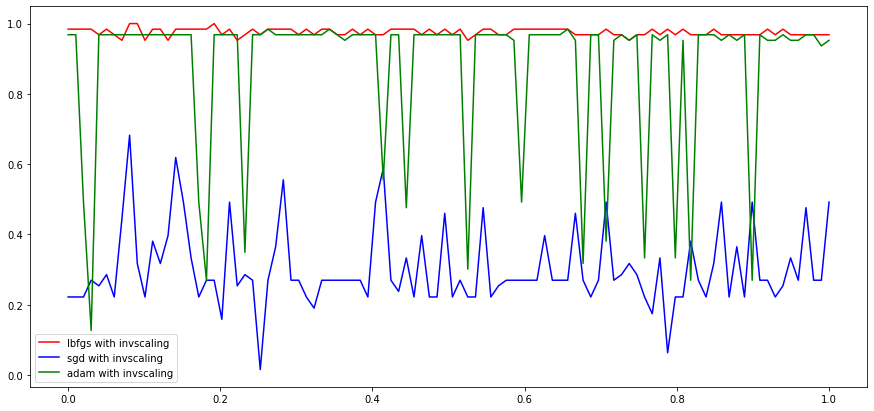

In [10]:
plt.figure(figsize=(15, 7))
plt.plot(alphas, acc_mlp7, color='red', label="lbfgs with invscaling")
plt.plot(alphas, acc_mlp8, color='blue', label="sgd with invscaling")
plt.plot(alphas, acc_mlp9, color='green', label="adam with invscaling")
plt.legend()
plt.show()

**3. Build learning curves for better explanation of your experiments.**

### MLPClassifier Learncurves

#### 1) Parameters: solver="lbfgs",  learning_rate="adaptive" 

In [11]:
train_sizes = np.linspace(0.1, 1, 20)
N_train, val_train, val_test = learning_curve(mlp1, X, y, train_sizes=train_sizes, cv=5)

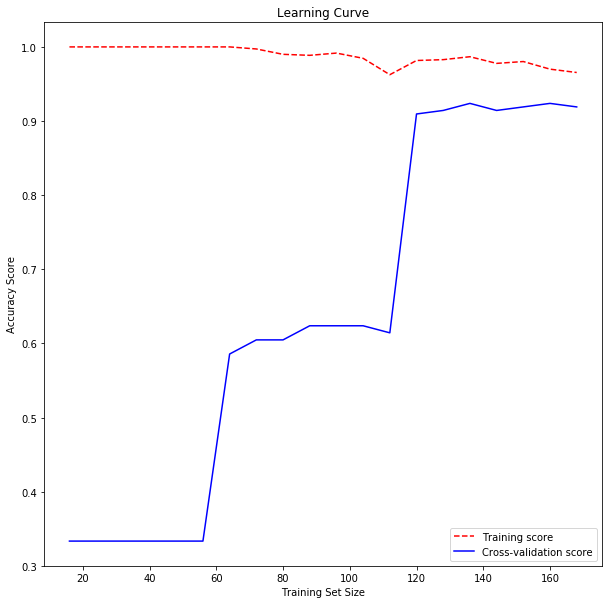

In [12]:
train_mean = np.mean(val_train, axis=1)
train_std = np.std(val_train, axis=1)

test_mean = np.mean(val_test, axis=1)
test_std = np.std(val_test, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(N_train, train_mean, '--', color="red",  label="Training score")
plt.plot(N_train, test_mean, color="blue", label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size") 
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

#### 2) Parameters: solver="sgd",  learning_rate="adaptive" 

In [13]:
train_sizes = np.linspace(0.1, 1, 20)
N_train2, val_train2, val_test2 = learning_curve(mlp2, X, y, train_sizes=train_sizes, cv=5)

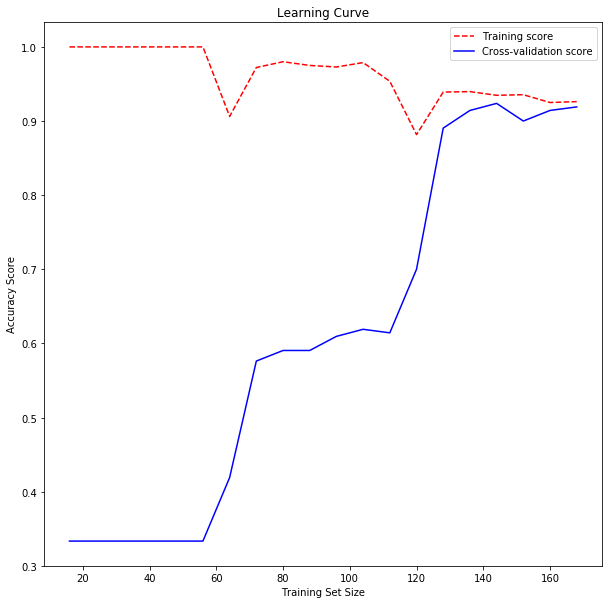

In [14]:
train_mean2 = np.mean(val_train2, axis=1)
train_std2 = np.std(val_train2, axis=1)

test_mean2 = np.mean(val_test2, axis=1)
test_std2 = np.std(val_test2, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(N_train2, train_mean2, '--', color="red",  label="Training score")
plt.plot(N_train2, test_mean2, color="blue", label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size") 
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

#### 3) Parameters: solver="adam",  learning_rate="adaptive" 

In [15]:
train_sizes = np.linspace(0.1, 1, 20)
N_train3, val_train3, val_test3 = learning_curve(mlp3, X, y, train_sizes=train_sizes, cv=5)

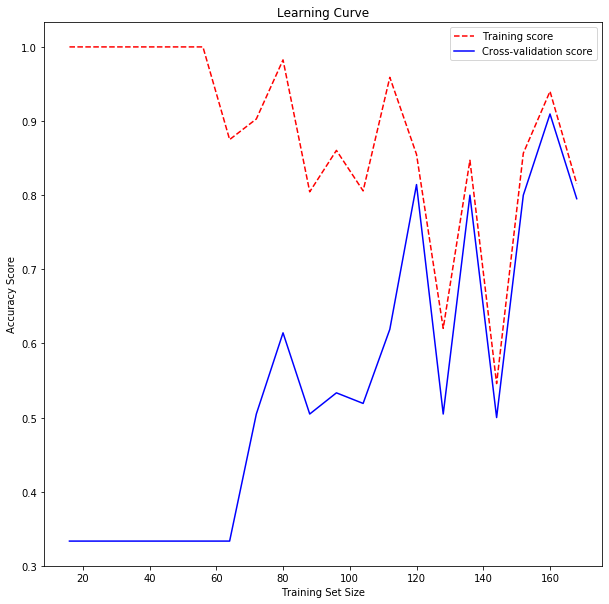

In [16]:
train_mean3 = np.mean(val_train3, axis=1)
train_std3 = np.std(val_train3, axis=1)

test_mean3 = np.mean(val_test3, axis=1)
test_std3 = np.std(val_test3, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(N_train3, train_mean3, '--', color="red",  label="Training score")
plt.plot(N_train3, test_mean3, color="blue", label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size") 
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

#### 4) Parameters: solver="lbfgs",  learning_rate="constant" 

In [17]:
train_sizes = np.linspace(0.1, 1, 20)
N_train4, val_train4, val_test4 = learning_curve(mlp4, X, y, train_sizes=train_sizes, cv=5)

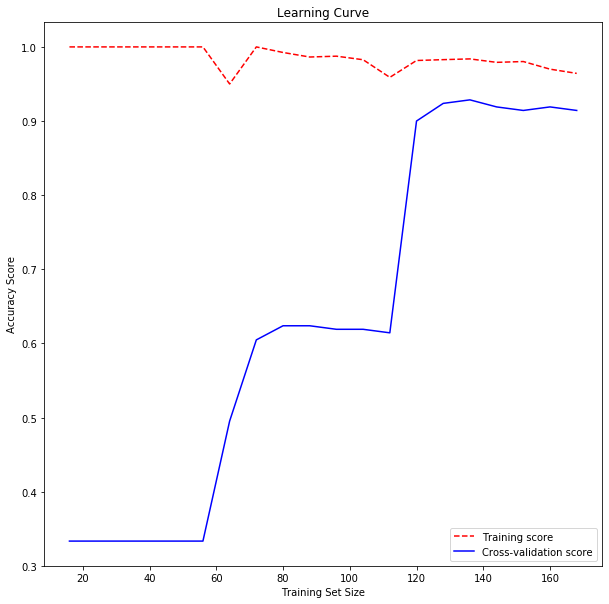

In [18]:
train_mean4 = np.mean(val_train4, axis=1)
train_std4 = np.std(val_train4, axis=1)

test_mean4 = np.mean(val_test4, axis=1)
test_std4 = np.std(val_test4, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(N_train4, train_mean4, '--', color="red",  label="Training score")
plt.plot(N_train4, test_mean4, color="blue", label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size") 
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

#### 5) Parameters: solver="sgd",  learning_rate="constant" 

In [19]:
train_sizes = np.linspace(0.1, 1, 20)
N_train5, val_train5, val_test5 = learning_curve(mlp5, X, y, train_sizes=train_sizes, cv=5)

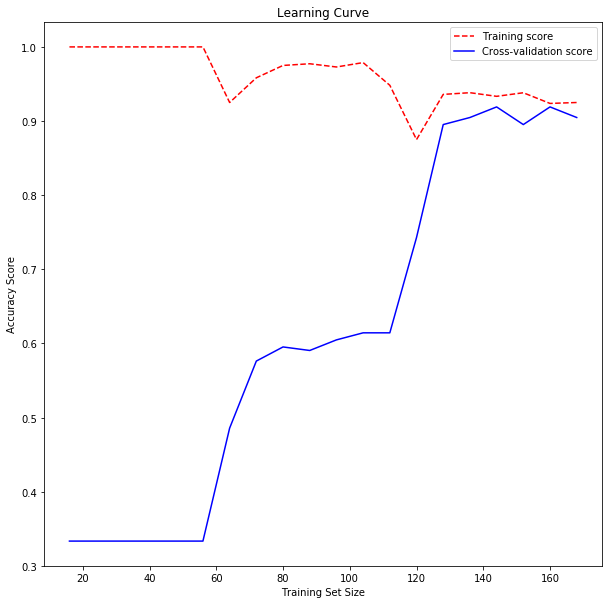

In [20]:
train_mean5 = np.mean(val_train5, axis=1)
train_std5 = np.std(val_train5, axis=1)

test_mean5 = np.mean(val_test5, axis=1)
test_std5 = np.std(val_test5, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(N_train5, train_mean5, '--', color="red",  label="Training score")
plt.plot(N_train5, test_mean5, color="blue", label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size") 
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

#### 6) Parameters: solver="adam",  learning_rate="constant" 

In [21]:
train_sizes = np.linspace(0.1, 1, 20)
N_train6, val_train6, val_test6 = learning_curve(mlp6, X, y, train_sizes=train_sizes, cv=5)

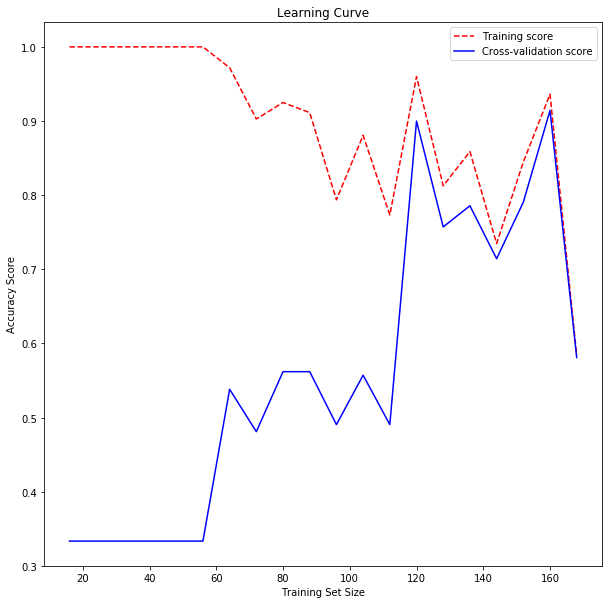

In [22]:
train_mean6 = np.mean(val_train6, axis=1)
train_std6 = np.std(val_train6, axis=1)

test_mean6 = np.mean(val_test6, axis=1)
test_std6 = np.std(val_test6, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(N_train6, train_mean6, '--', color="red",  label="Training score")
plt.plot(N_train6, test_mean6, color="blue", label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size") 
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

#### 7) Parameters: solver="lbfgs",  learning_rate="invscaling" 

In [23]:
train_sizes = np.linspace(0.1, 1, 20)
N_train7, val_train7, val_test7 = learning_curve(mlp7, X, y, train_sizes=train_sizes, cv=5)

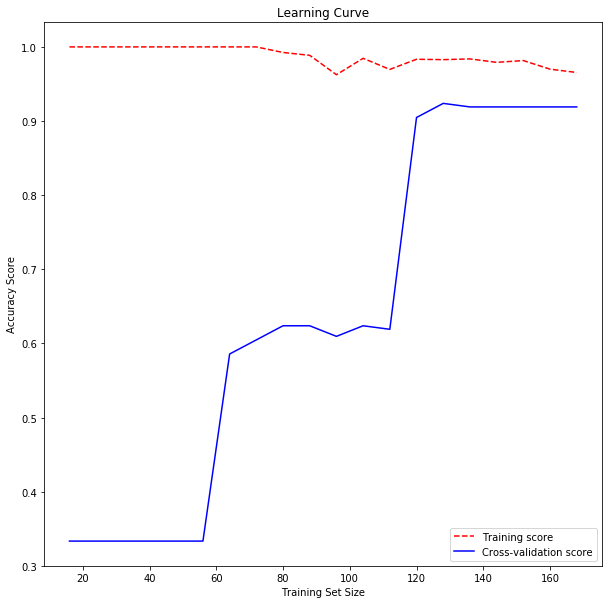

In [24]:
train_mean7 = np.mean(val_train7, axis=1)
train_std7 = np.std(val_train7, axis=1)

test_mean7 = np.mean(val_test7, axis=1)
test_std7 = np.std(val_test7, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(N_train7, train_mean7, '--', color="red",  label="Training score")
plt.plot(N_train7, test_mean7, color="blue", label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size") 
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

#### 8) Parameters: solver="sgd",  learning_rate="invscaling" 

In [25]:
train_sizes = np.linspace(0.1, 1, 20)
N_train8, val_train8, val_test8 = learning_curve(mlp8, X, y, train_sizes=train_sizes, cv=5)

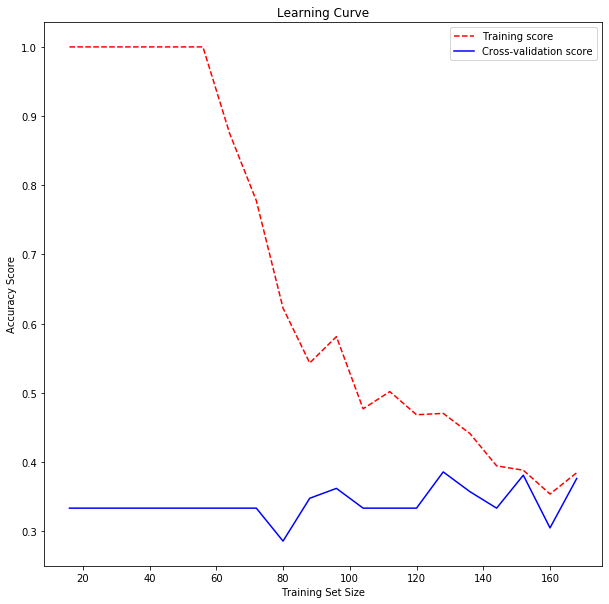

In [26]:
train_mean8 = np.mean(val_train8, axis=1)
train_std8 = np.std(val_train8, axis=1)

test_mean8 = np.mean(val_test8, axis=1)
test_std8 = np.std(val_test8, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(N_train8, train_mean8, '--', color="red",  label="Training score")
plt.plot(N_train8, test_mean8, color="blue", label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size") 
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

#### 9) Parameters: solver="adam",  learning_rate="invscaling" 

In [27]:
train_sizes = np.linspace(0.1, 1, 20)
N_train9, val_train9, val_test9 = learning_curve(mlp9, X, y, train_sizes=train_sizes, cv=5)

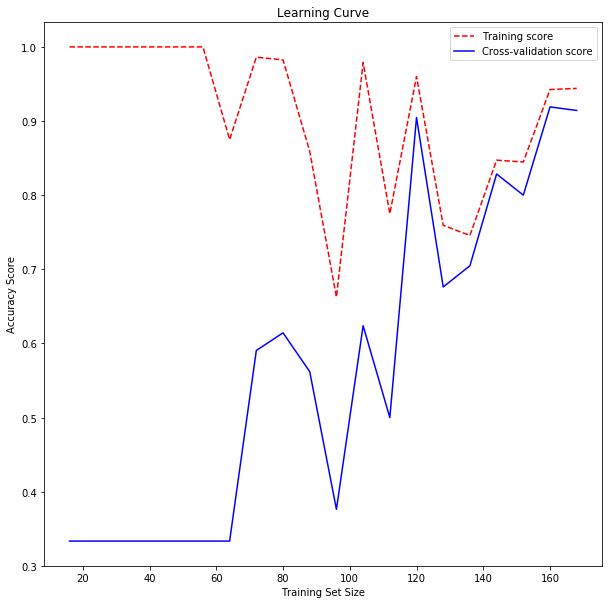

In [28]:
train_mean9 = np.mean(val_train9, axis=1)
train_std9 = np.std(val_train9, axis=1)

test_mean9 = np.mean(val_test9, axis=1)
test_std9 = np.std(val_test9, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(N_train9, train_mean9, '--', color="red",  label="Training score")
plt.plot(N_train9, test_mean9, color="blue", label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size") 
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

#### In conclusion the parameters solver="sgd",  learning_rate="adaptive"  looks the best on the learning curve
